<a href="https://colab.research.google.com/github/adewoleopeyemi/AnamolyDetectionAlgorithmforAgriculture/blob/testsandtrial/TemperatureAnamolyDetectionAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Aug 21 18:18:01 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    14W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as rc
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

register_matplotlib_converters()

sns.set(style='whitegrid', palette = 'muted', font_scale = 1.5)
rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dataset = pd.read_csv('drive/My Drive/NConservatory__allMerged-1.csv', parse_dates=['date'], index_col='date')

In [4]:
dataset.head()

,co2_1,co2_2,co2_3,co2_4,dew_1,dew_2,dew_3,dew_4,relH_1,relH_2,relH_3,relH_4,temp_1,temp_2,temp_3,temp_4,externTemp_1,externHumid_1,externCondition_1,externSunrise_1
date,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:03-08:00,480.750000,474.886993,477.817993,474.886993,52.214100,51.510899,51.862499,52.038300,73.917000,78.438202,77.531898,76.550697,59.400002,60.000000,58.799999,58.500000,35,76,4,1
2018-01-01 00:15:03-08:00,480.750000,474.886993,474.886993,474.886993,52.389801,51.686699,51.686699,51.862499,74.492798,79.800903,78.598999,76.601303,59.200001,59.799999,58.500000,58.299999,35,76,4,1
2018-01-01 00:30:03-08:00,477.817993,477.817993,474.886993,474.886993,52.214100,51.510899,51.510899,51.862499,74.275002,80.143303,78.370903,76.875603,59.099998,59.700001,58.299999,58.000000,35,77,4,1
2018-01-01 00:45:03-08:00,486.612000,477.817993,474.886993,477.817993,52.038300,51.335201,51.510899,51.510899,75.074402,79.912003,78.990196,76.428596,58.900002,59.400002,58.000000,57.799999,35,77,4,1
2018-01-01 01:00:03-08:00,486.612000,474.886993,477.817993,477.817993,51.862499,51.335201,51.159401,51.335201,74.635696,79.967499,79.274902,76.205597,58.799999,59.200001,57.799999,57.700001,35,77,4,1


In [5]:
dataset.tail()

,co2_1,co2_2,co2_3,co2_4,dew_1,dew_2,dew_3,dew_4,relH_1,relH_2,relH_3,relH_4,temp_1,temp_2,temp_3,temp_4,externTemp_1,externHumid_1,externCondition_1,externSunrise_1
date,,,,,,,,,,,,,,,,,,,,
2018-12-31 22:59:52-08:00,543.658997,537.814026,537.814026,555.351013,49.577400,49.049999,50.456299,50.456299,69.421501,70.626404,70.500198,67.718102,61.200001,60.200001,59.099998,58.599998,33,80,4,0
2018-12-31 23:14:52-08:00,540.737000,537.814026,537.814026,549.505005,49.928902,49.577400,50.807800,50.807800,71.087997,72.329903,72.160301,68.607597,61.000000,60.000000,58.799999,58.500000,33,80,4,0
2018-12-31 23:29:52-08:00,543.658997,537.814026,537.814026,549.505005,49.577400,49.401600,50.456299,50.456299,70.166397,71.902000,72.204697,68.199898,61.200001,60.200001,58.599998,58.299999,33,80,4,0
2018-12-31 23:44:52-08:00,540.737000,531.968018,537.814026,537.814026,49.577400,49.577400,50.632000,50.456299,70.625999,71.902000,72.160301,68.199898,61.000000,60.200001,58.599998,58.500000,33,80,4,0
2018-12-31 23:59:52-08:00,537.814026,534.890991,531.968018,543.658997,49.753101,49.753101,51.159401,50.456299,72.020302,72.374702,72.374702,68.199898,61.000000,60.200001,58.599998,58.599998,33,80,4,0


In [6]:
dataset.shape

(34934, 20)

In [7]:
co2_1_for_the_january = dataset['co2_1'][:3000]
co2_2_for_the_january = dataset['co2_2'][:3000]

No handles with labels found to put in legend.


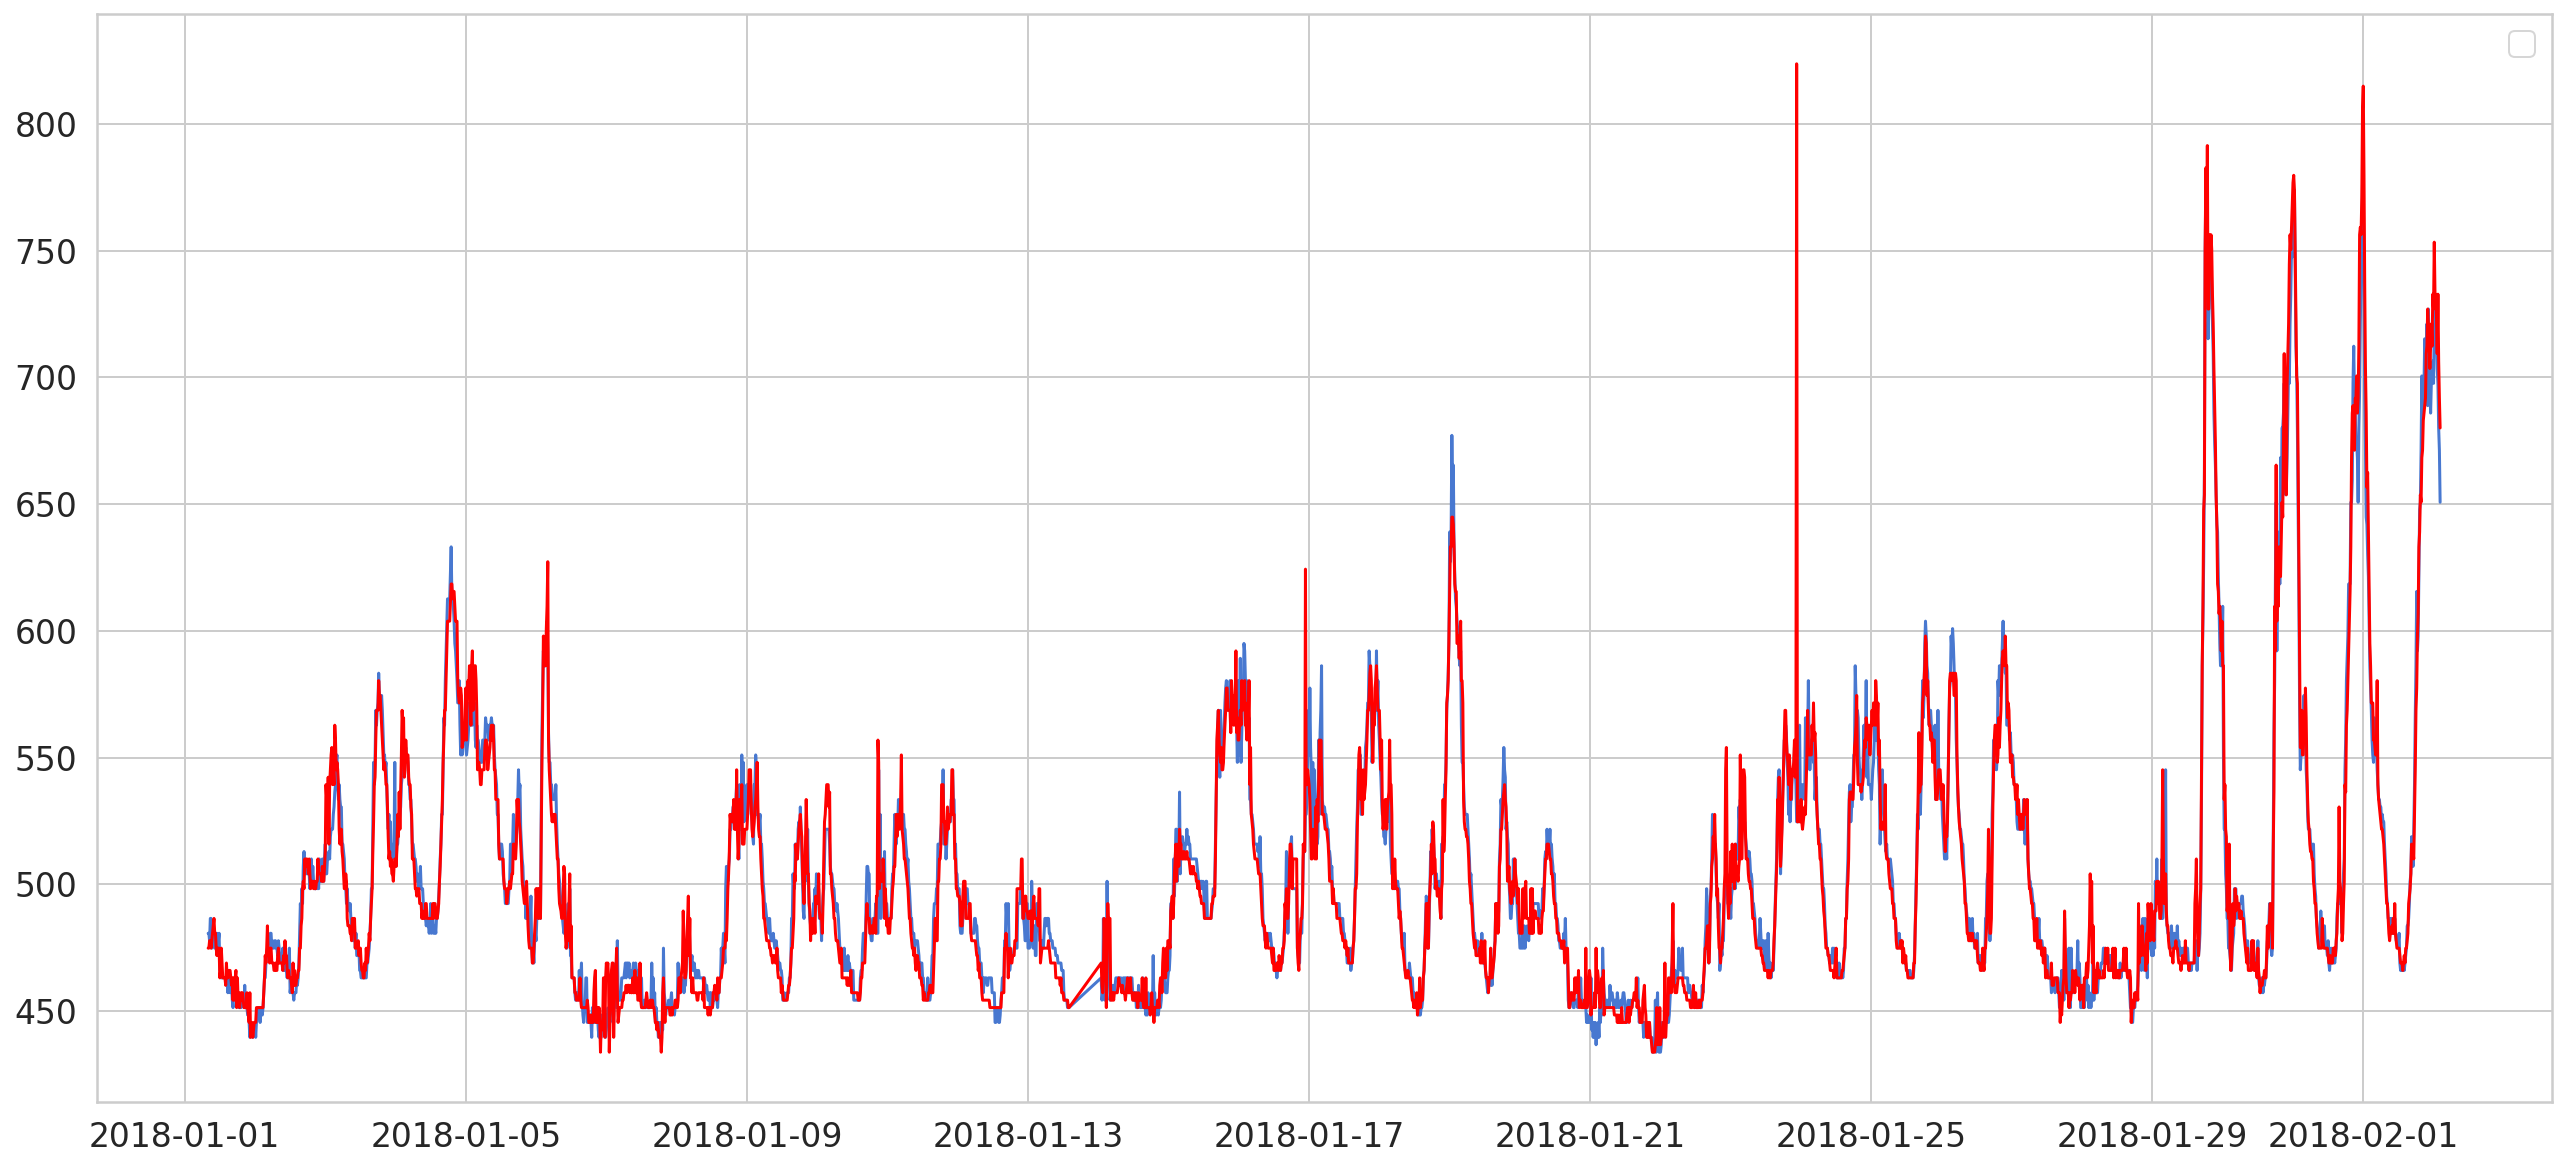

In [8]:
plt.plot(co2_1_for_the_january)
plt.plot(co2_2_for_the_january, color = 'red')
plt.legend()

In [9]:
co2_1_for_the_feburary = dataset['co2_1'][3000:6000]
co2_2_for_the_feburary = dataset['co2_2'][3000:6000]

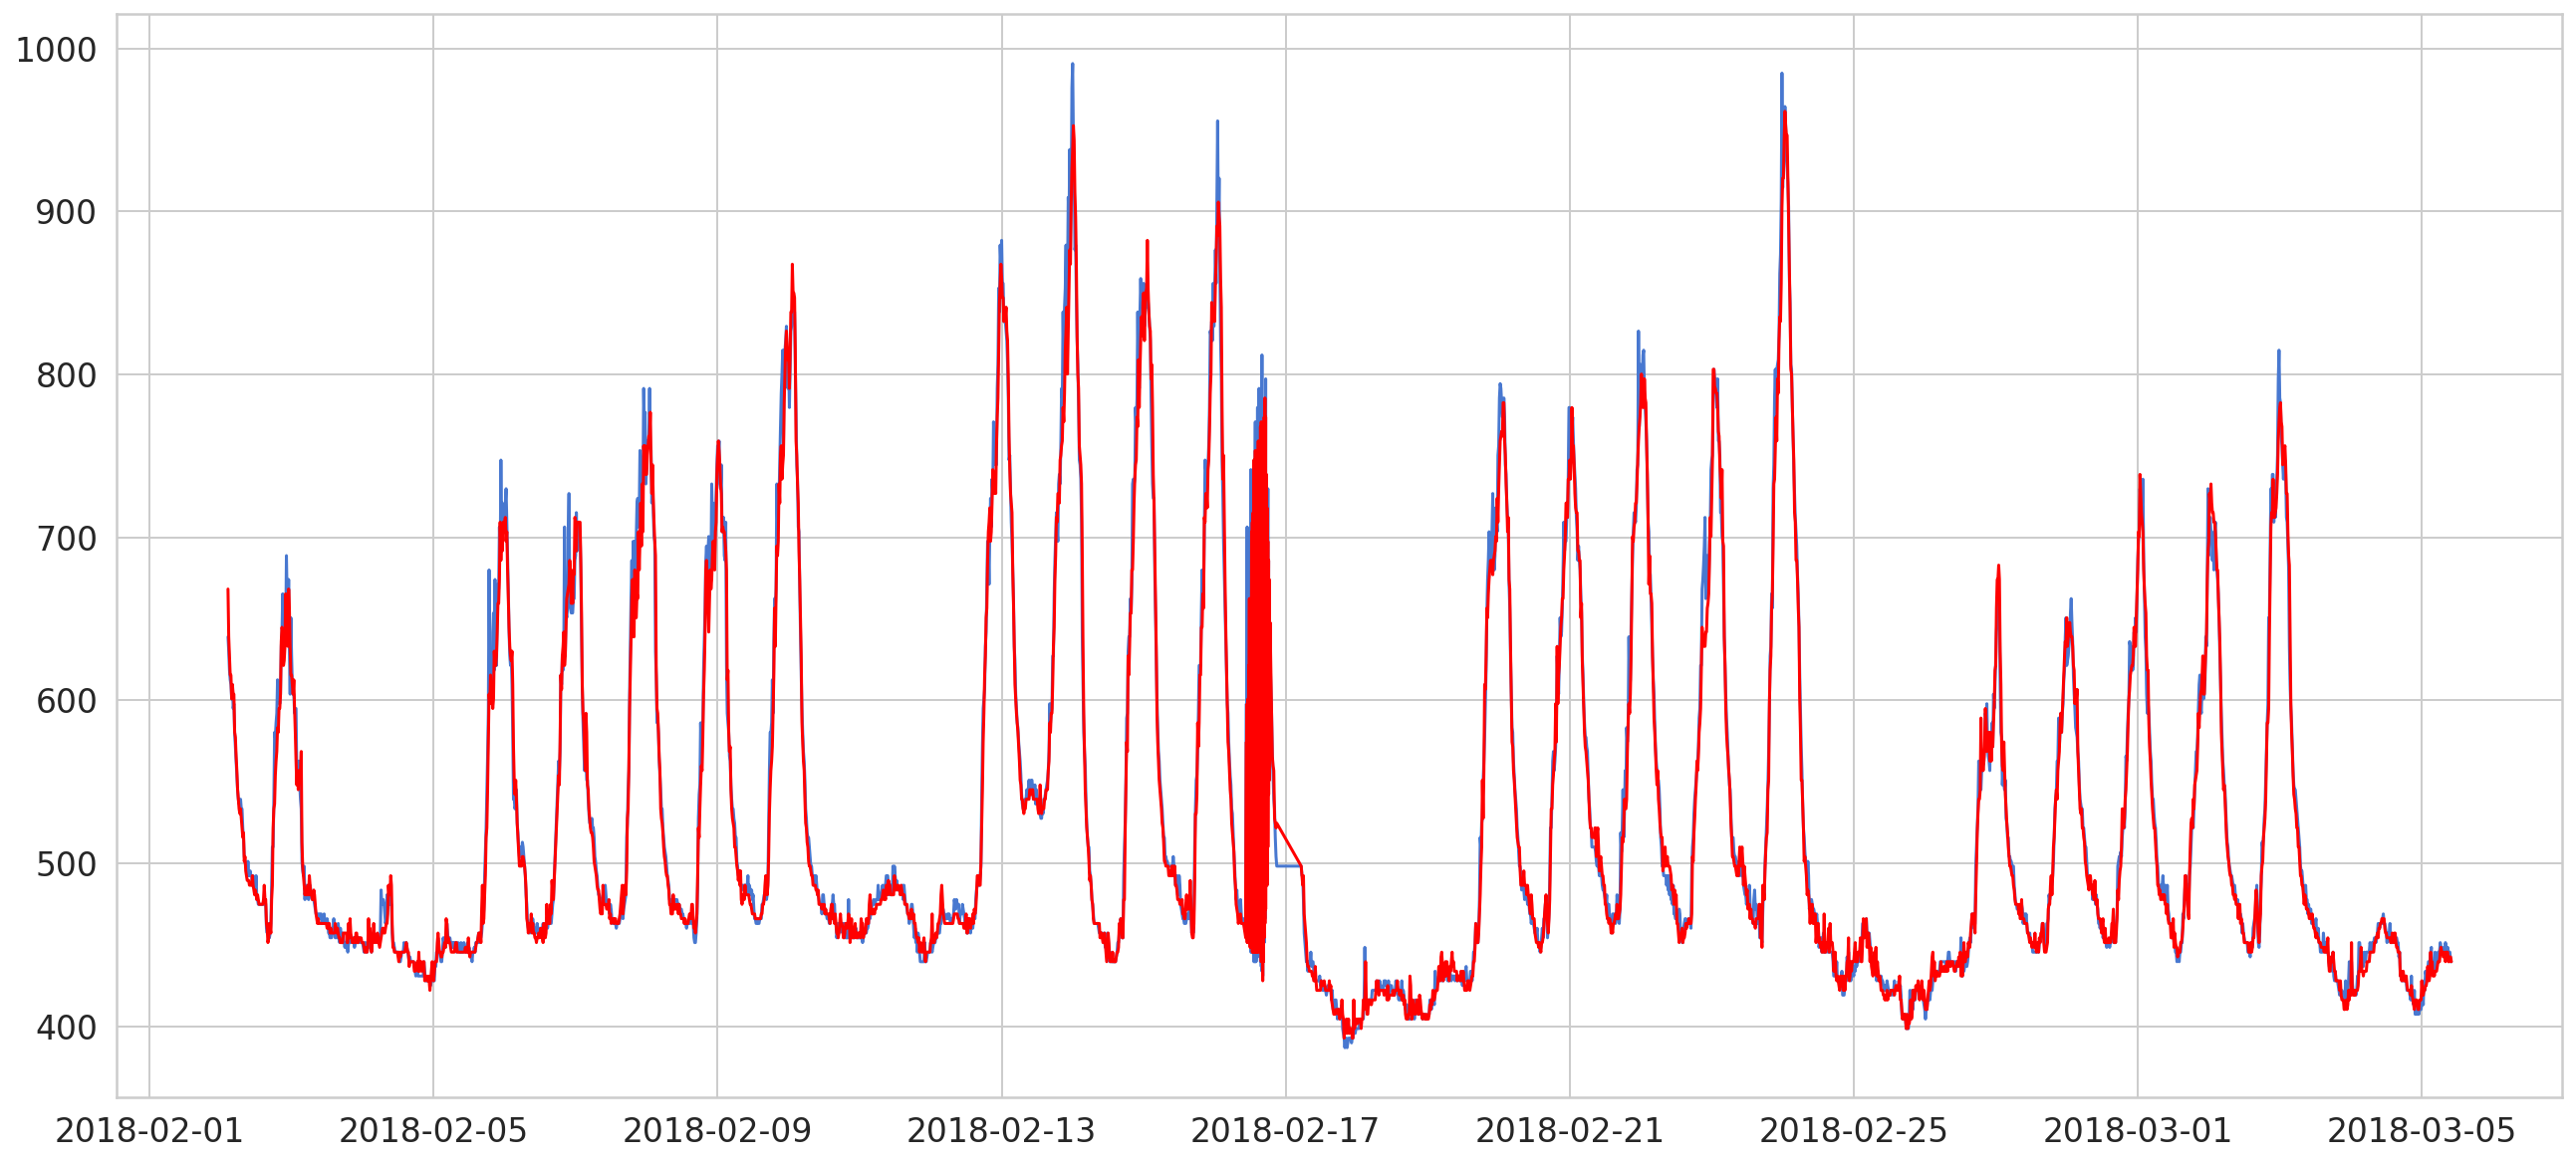

In [10]:
plt.plot(co2_1_for_the_feburary)
plt.plot(co2_2_for_the_feburary, color = 'red')

In [11]:
co2_overall = dataset[['co2_1','co2_2', 'co2_3', 'co2_4']]

In [12]:
co2_overall.head()

,co2_1,co2_2,co2_3,co2_4
date,,,,
2018-01-01 00:00:03-08:00,480.750000,474.886993,477.817993,474.886993
2018-01-01 00:15:03-08:00,480.750000,474.886993,474.886993,474.886993
2018-01-01 00:30:03-08:00,477.817993,477.817993,474.886993,474.886993
2018-01-01 00:45:03-08:00,486.612000,477.817993,474.886993,477.817993
2018-01-01 01:00:03-08:00,486.612000,474.886993,477.817993,477.817993


In [13]:
co2_overall_mean = co2_overall.mean(axis=1)

In [14]:
co2_overall_mean.head(20)

date
2018-01-01 00:00:03-08:00    477.085495
2018-01-01 00:15:03-08:00    476.352745
2018-01-01 00:30:03-08:00    476.352493
2018-01-01 00:45:03-08:00    479.283745
2018-01-01 01:00:03-08:00    479.283745
2018-01-01 01:15:03-08:00    478.550995
2018-01-01 01:30:03-08:00    482.215248
2018-01-01 01:45:03-08:00    481.482246
2018-01-01 02:00:03-08:00    481.482498
2018-01-01 02:15:03-08:00    480.749748
2018-01-01 02:30:03-08:00    477.818245
2018-01-01 02:45:03-08:00    478.551247
2018-01-01 03:00:03-08:00    476.352493
2018-01-01 03:15:03-08:00    476.352745
2018-01-01 03:30:03-08:00    473.420990
2018-01-01 03:45:03-08:00    473.421242
2018-01-01 04:00:03-08:00    463.894005
2018-01-01 04:15:03-08:00    466.825493
2018-01-01 04:30:03-08:00    466.092506
2018-01-01 04:45:03-08:00    466.092499
dtype: float64

In [15]:
dataset['co2_overall_mean'] = co2_overall_mean

In [16]:
dataset = dataset.drop(['co2_1','co2_2', 'co2_3', 'co2_4'], axis = 1)

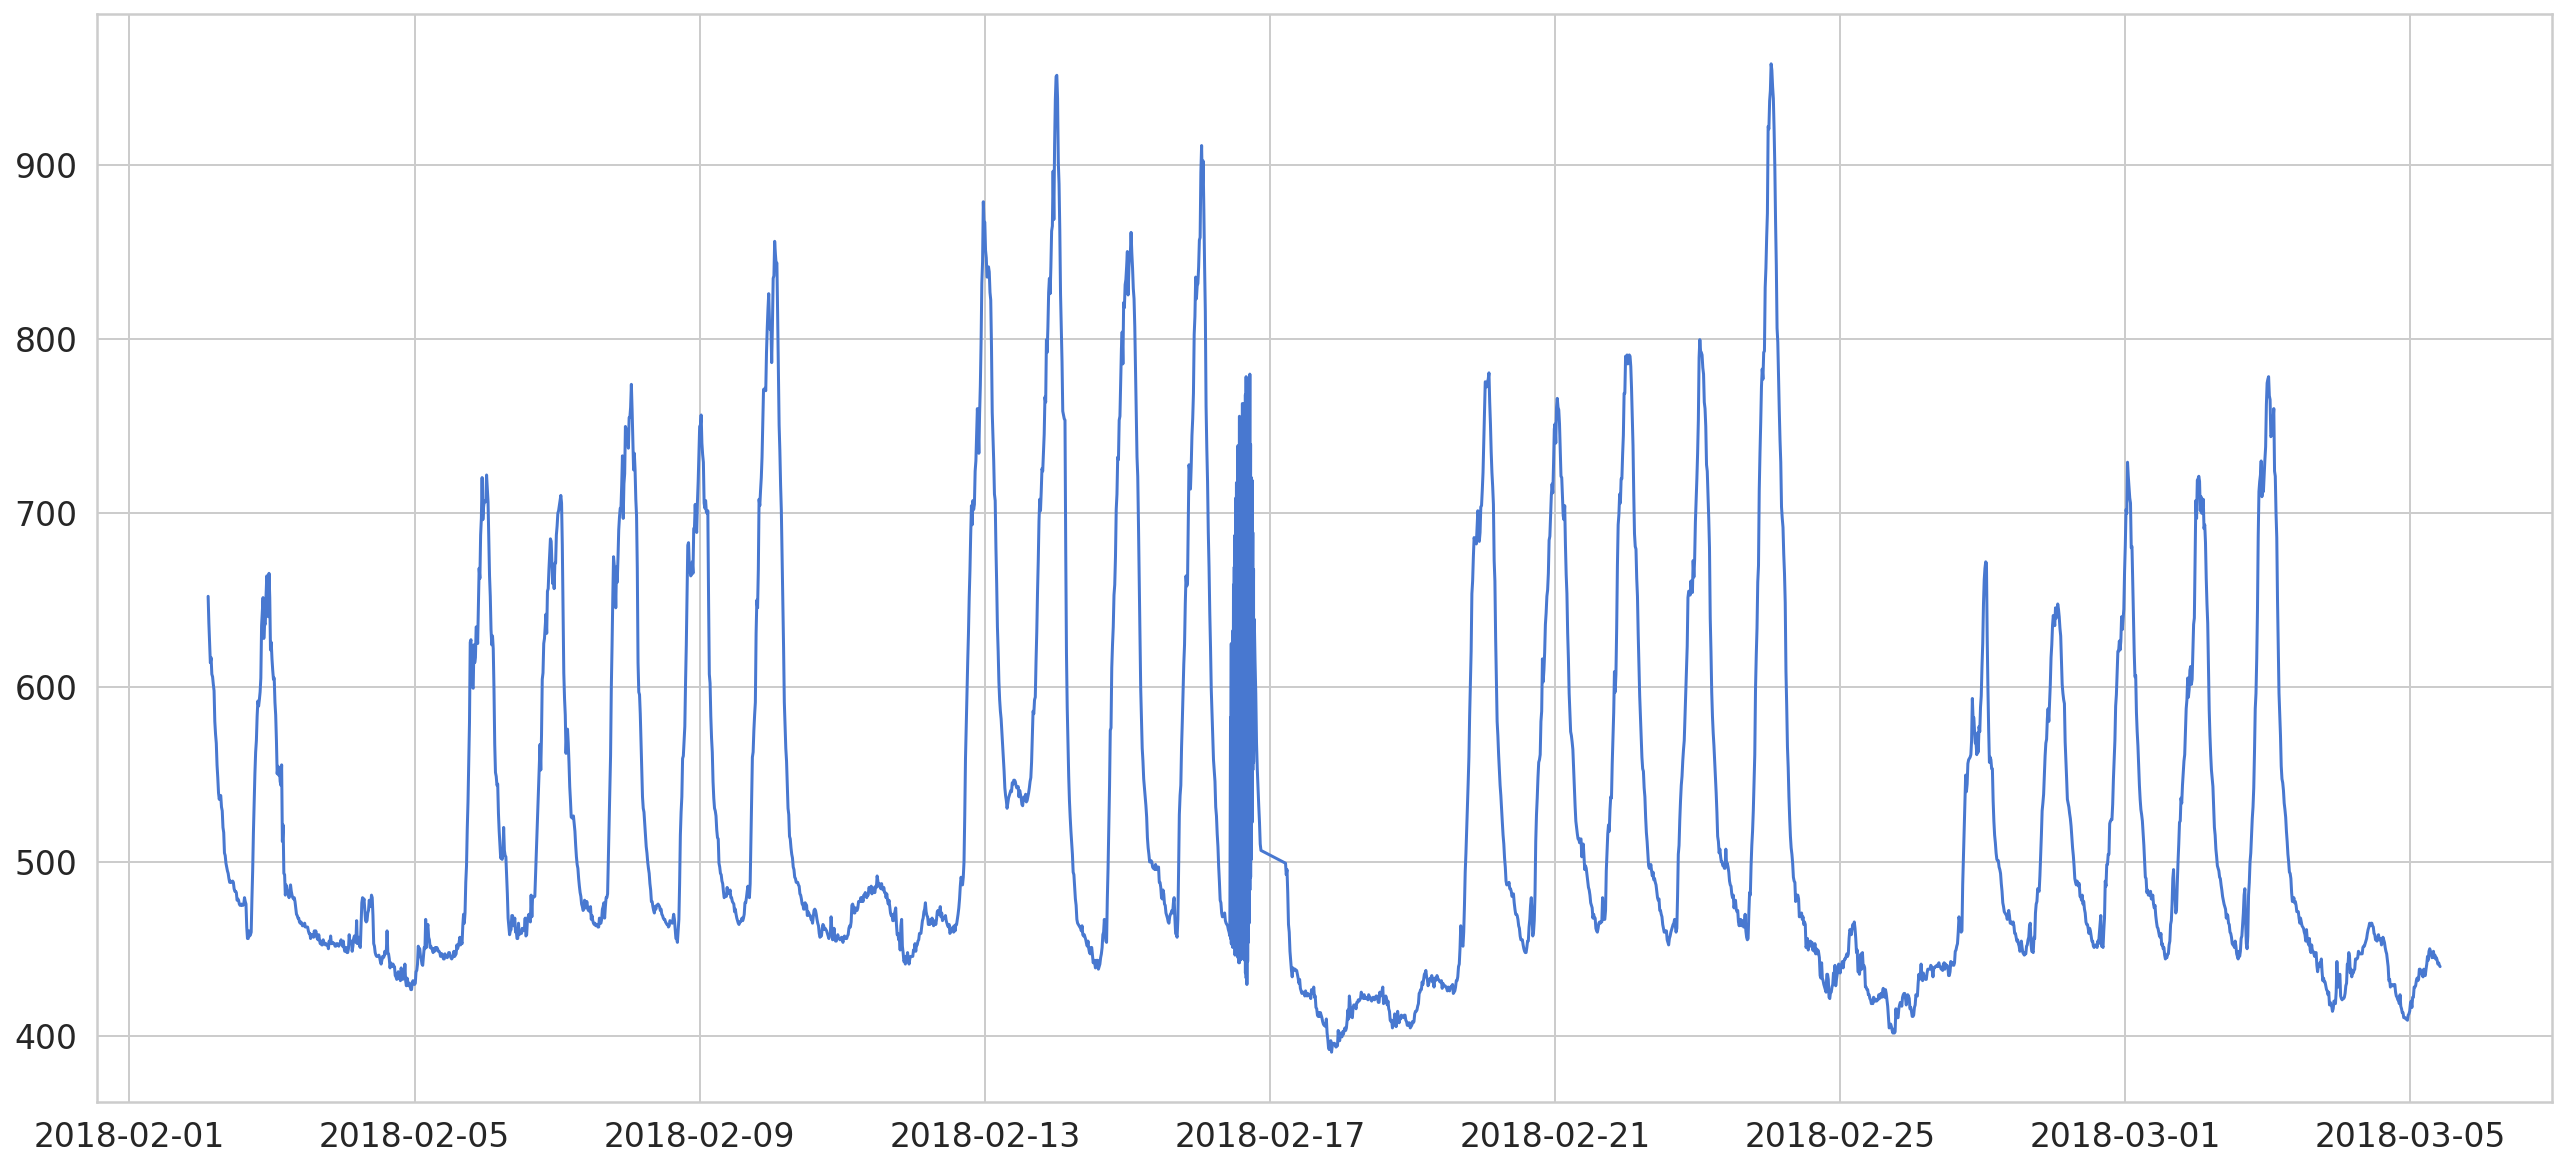

In [17]:
co2_1_for_the_feburary = dataset['co2_overall_mean'][3000:6000]
plt.plot(co2_1_for_the_feburary)

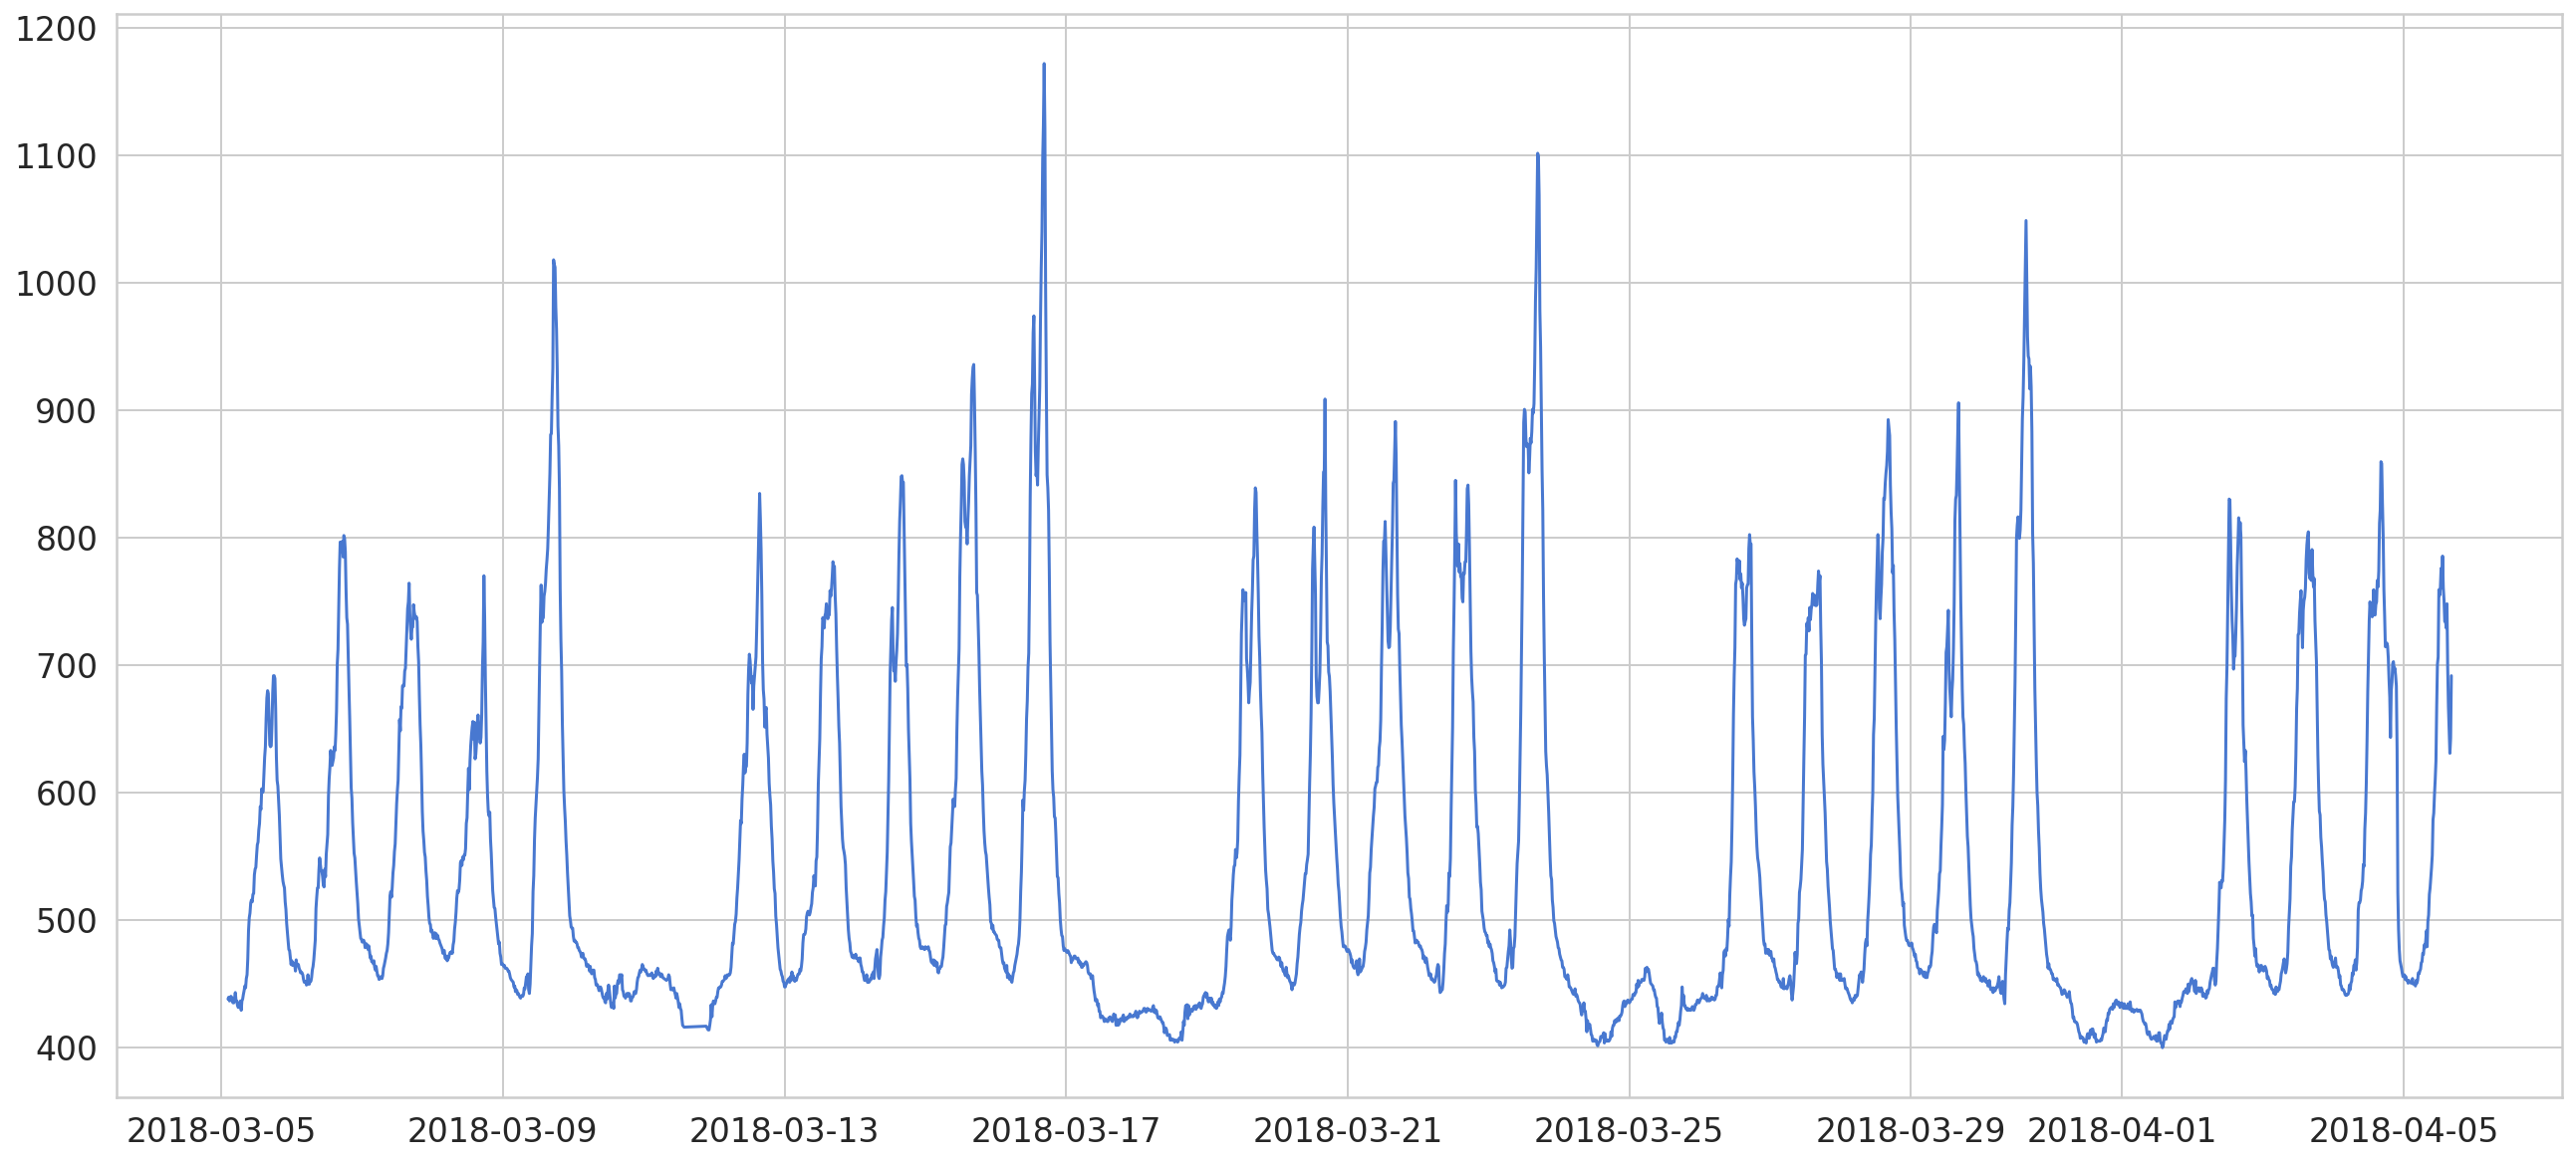

In [18]:
co2_1_for_the_march = dataset['co2_overall_mean'][6000:9000]
plt.plot(co2_1_for_the_march)

In [19]:
def find_overall_mean( feature_name, features, dataframe):
  overall = dataset[features]
  dataframe = dataframe.drop(features, axis = 1)
  overall_mean = overall.mean(axis=1)
  dataframe[feature_name + '_overall_mean'] = overall_mean
  return dataframe

In [20]:
features = ['dew_1',	'dew_2', 'dew_3',	'dew_4']
dataset = find_overall_mean('dew', features, dataset)

In [21]:
dataset.head()

,relH_1,relH_2,relH_3,relH_4,temp_1,temp_2,temp_3,temp_4,externTemp_1,externHumid_1,externCondition_1,externSunrise_1,co2_overall_mean,dew_overall_mean
date,,,,,,,,,,,,,,
2018-01-01 00:00:03-08:00,73.917000,78.438202,77.531898,76.550697,59.400002,60.000000,58.799999,58.500000,35,76,4,1,477.085495,51.906449
2018-01-01 00:15:03-08:00,74.492798,79.800903,78.598999,76.601303,59.200001,59.799999,58.500000,58.299999,35,76,4,1,476.352745,51.906425
2018-01-01 00:30:03-08:00,74.275002,80.143303,78.370903,76.875603,59.099998,59.700001,58.299999,58.000000,35,77,4,1,476.352493,51.774599
2018-01-01 00:45:03-08:00,75.074402,79.912003,78.990196,76.428596,58.900002,59.400002,58.000000,57.799999,35,77,4,1,479.283745,51.598825
2018-01-01 01:00:03-08:00,74.635696,79.967499,79.274902,76.205597,58.799999,59.200001,57.799999,57.700001,35,77,4,1,479.283745,51.423076


In [22]:
features = ['relH_1',	'relH_2', 'relH_3',	'relH_4']
dataset = find_overall_mean('relH', features, dataset)

In [23]:
dataset.head()

,temp_1,temp_2,temp_3,temp_4,externTemp_1,externHumid_1,externCondition_1,externSunrise_1,co2_overall_mean,dew_overall_mean,relH_overall_mean
date,,,,,,,,,,,
2018-01-01 00:00:03-08:00,59.400002,60.000000,58.799999,58.500000,35,76,4,1,477.085495,51.906449,76.609449
2018-01-01 00:15:03-08:00,59.200001,59.799999,58.500000,58.299999,35,76,4,1,476.352745,51.906425,77.373501
2018-01-01 00:30:03-08:00,59.099998,59.700001,58.299999,58.000000,35,77,4,1,476.352493,51.774599,77.416203
2018-01-01 00:45:03-08:00,58.900002,59.400002,58.000000,57.799999,35,77,4,1,479.283745,51.598825,77.601299
2018-01-01 01:00:03-08:00,58.799999,59.200001,57.799999,57.700001,35,77,4,1,479.283745,51.423076,77.520924


In [24]:
features = ['temp_1',	'temp_2', 'temp_3',	'temp_4']
dataset = find_overall_mean('temp', features, dataset)

In [25]:
dataset.head()

,externTemp_1,externHumid_1,externCondition_1,externSunrise_1,co2_overall_mean,dew_overall_mean,relH_overall_mean,temp_overall_mean
date,,,,,,,,
2018-01-01 00:00:03-08:00,35,76,4,1,477.085495,51.906449,76.609449,59.175000
2018-01-01 00:15:03-08:00,35,76,4,1,476.352745,51.906425,77.373501,58.950000
2018-01-01 00:30:03-08:00,35,77,4,1,476.352493,51.774599,77.416203,58.775000
2018-01-01 00:45:03-08:00,35,77,4,1,479.283745,51.598825,77.601299,58.525001
2018-01-01 01:00:03-08:00,35,77,4,1,479.283745,51.423076,77.520924,58.375000


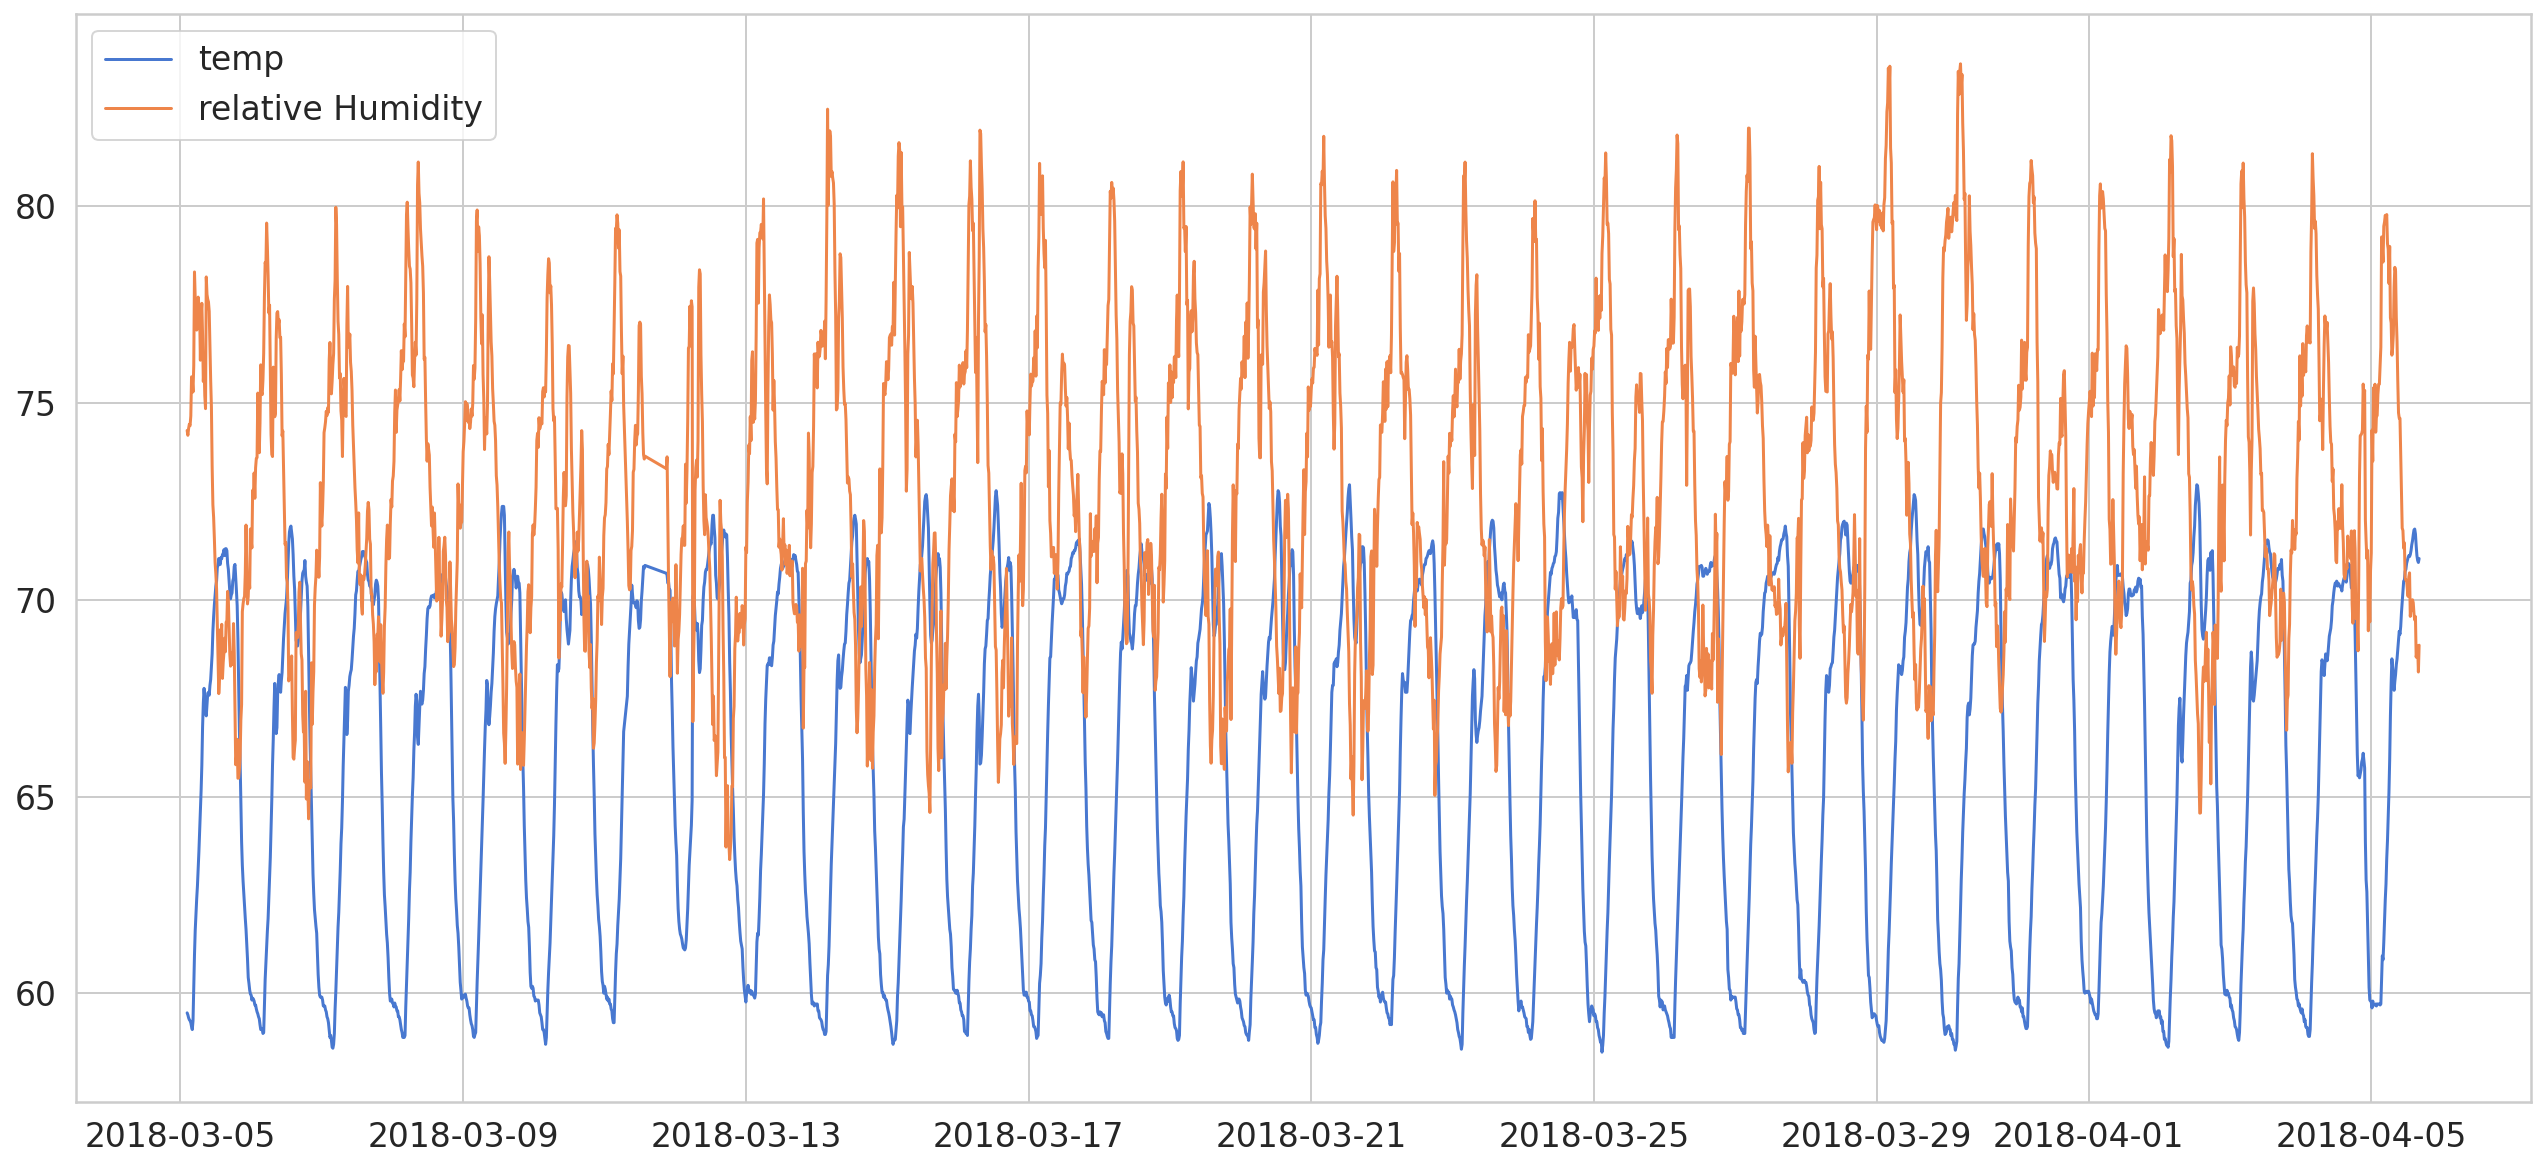

In [26]:
co2_for_the_march = dataset['co2_overall_mean'][6000:9000]
temp_for_the_march = dataset['temp_overall_mean'][6000:9000]
relH_for_the_march = dataset['relH_overall_mean'][6000:9000]

plt.plot(temp_for_the_march, label='temp')
plt.plot(relH_for_the_march, label = 'relative Humidity')
plt.legend()

In [27]:
train_size = int(len(dataset)*.95)

In [28]:
test_size = len(dataset)-train_size

In [29]:
train, test = dataset.iloc[:train_size], dataset.iloc[train_size:len(dataset)]

In [30]:
print(dataset.shape)
print(train.shape)
print(test.shape)

(34934, 8)
(33187, 8)
(1747, 8)


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train1 = train[['externTemp_1'	,'externHumid_1'	,'externCondition_1'	,'externSunrise_1'	,'co2_overall_mean'	,'dew_overall_mean',	'relH_overall_mean'	,'temp_overall_mean']]
scaler = scaler.fit(train1)

In [32]:
train = scaler.transform(train[['externTemp_1'	,'externHumid_1'	,'externCondition_1'	,'externSunrise_1'	,'co2_overall_mean'	,'dew_overall_mean',	'relH_overall_mean'	,'temp_overall_mean']])

In [33]:
train.shape

(33187, 8)

In [34]:
test = scaler.transform(test[['externTemp_1'	,'externHumid_1'	,'externCondition_1'	,'externSunrise_1'	,'co2_overall_mean'	,'dew_overall_mean',	'relH_overall_mean'	,'temp_overall_mean']])

In [35]:
y = dataset.iloc[:train_size]['temp_overall_mean']

In [36]:
def load_data(X, y, sequence_length):
  Xs, Ys = [], []
  for i in range(len(X) - sequence_length):
    v = X[i : (i+sequence_length)]
    Xs.append(v)
    Ys.append(y.iloc[i+sequence_length])

  return np.array(Xs), np.array(Ys)


In [37]:
Sequence_length = 30
X_train, y_train = load_data(train, y, sequence_length=Sequence_length)

In [38]:
X_train.shape

(33157, 30, 8)

In [39]:
y_train.shape

(33157,)

In [40]:
y = dataset.iloc[train_size:len(dataset)]['temp_overall_mean']

In [41]:
X_test, y_test = load_data(test, y, Sequence_length)

In [42]:
X_test.shape

(1717, 30, 8)

In [43]:
y_test.shape

(1717,)

In [44]:
from keras.models import Model
from keras.layers import RepeatVector, Reshape, Dense, LSTM, TimeDistributed, Permute, Concatenate, Multiply, Lambda, Activation
from keras import Input
import keras.backend as K


input = Input(shape = (X_train.shape[1], X_train.shape[2]))
x = input
x = LSTM(100, return_sequences = True)(x)
x = LSTM(100, return_sequences=True)(x)

e = Dense(1, activation = 'tanh')(x)
e = Reshape([-1])(e)

alpha = Activation('softmax')(e)
c = Permute([2, 1])(RepeatVector(100)(alpha))
c = Multiply()([x, c])
c = Lambda(lambda xin: K.sum(xin, axis = 1), output_shape=(100,))(c)

x = RepeatVector(X_train.shape[1])(c)
output = TimeDistributed(Dense(1))(x)

model=Model(input, output)
att_model = Model([input, alpha])

In [45]:
model.compile(loss = 'mse', optimizer = keras.optimizers.Adam(0.001))

In [46]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30, 8)]      0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 30, 100)      43600       input_1[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 30, 100)      80400       lstm[0][0]                       
__________________________________________________________________________________________________
dense (Dense)                   (None, 30, 1)        101         lstm_1[0][0]                     
_______________________________________________________________________________________

In [47]:
history = model.fit(X_train, y_train, epochs = 40, batch_size = 64, validation_split = 0.1, shuffle=False)

Epoch 1/40
467/467 [==============================] - 4s 8ms/step - loss: 1310.0901 - val_loss: 267.7727
Epoch 2/40
467/467 [==============================] - 3s 7ms/step - loss: 93.2302 - val_loss: 24.0028
Epoch 3/40
467/467 [==============================] - 3s 7ms/step - loss: 20.2459 - val_loss: 19.8227
Epoch 4/40
467/467 [==============================] - 3s 7ms/step - loss: 17.0416 - val_loss: 20.9857
Epoch 5/40
467/467 [==============================] - 3s 7ms/step - loss: 9.1620 - val_loss: 6.0006
Epoch 6/40
467/467 [==============================] - 3s 7ms/step - loss: 4.3106 - val_loss: 5.2477
Epoch 7/40
467/467 [==============================] - 3s 7ms/step - loss: 3.8454 - val_loss: 4.4894
Epoch 8/40
467/467 [==============================] - 3s 7ms/step - loss: 3.6814 - val_loss: 4.4005
Epoch 9/40
467/467 [==============================] - 3s 7ms/step - loss: 3.1958 - val_loss: 2.9205
Epoch 10/40
467/467 [==============================] - 3s 7ms/step - loss: 2.1300 - val_l

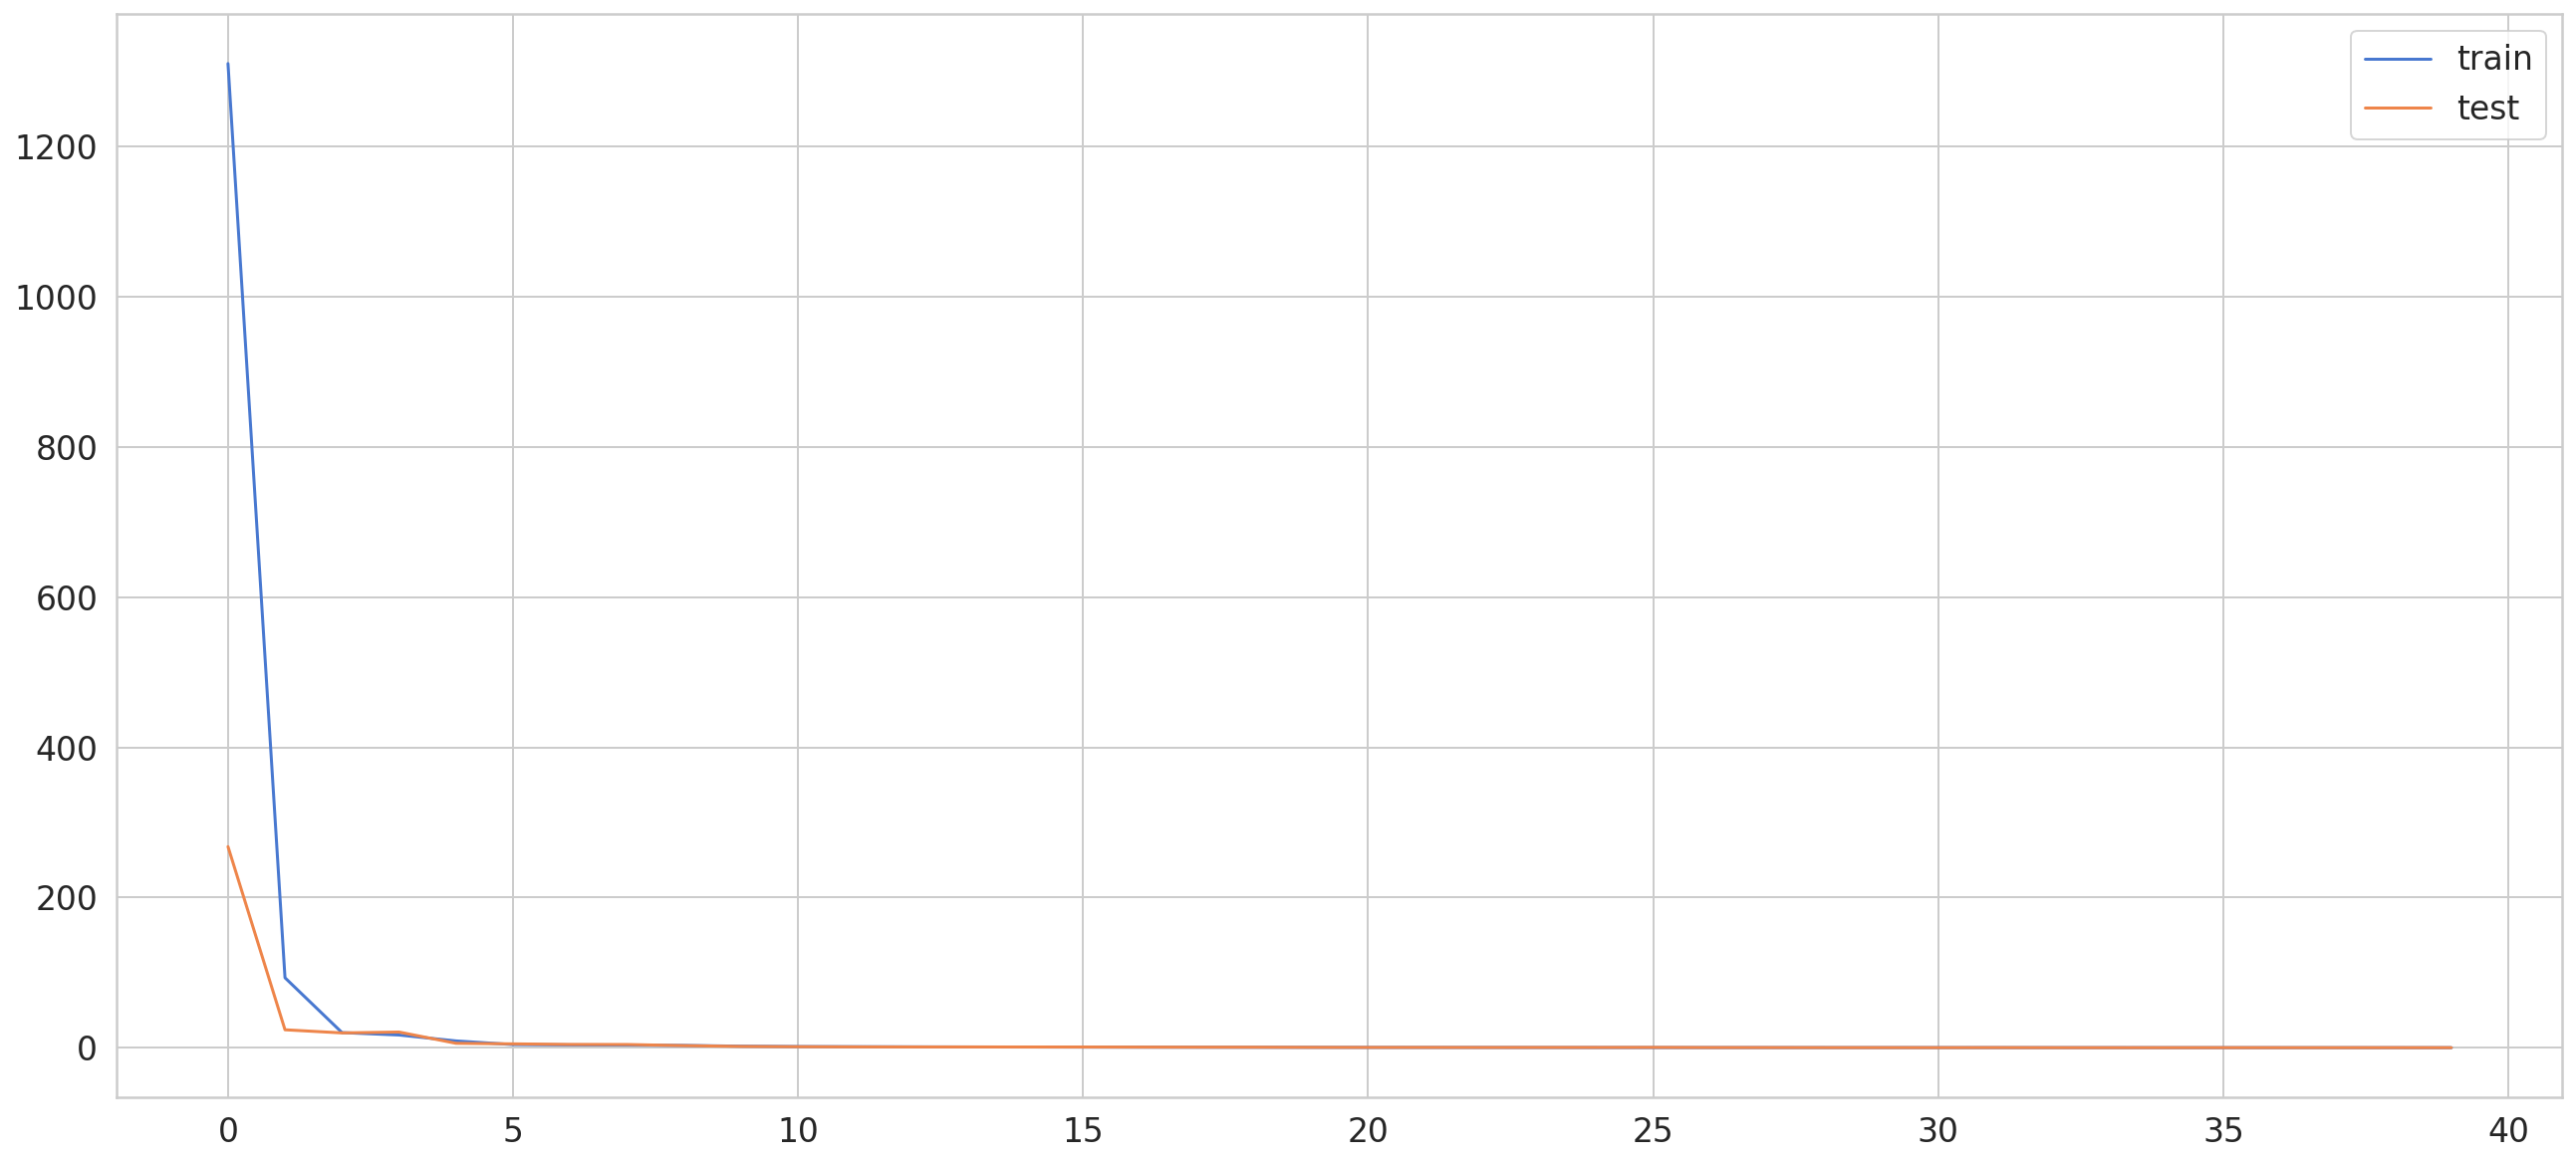

In [48]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()

In [49]:
X_train_pred = model.predict(X_train)

In [50]:
X_train_pred.shape

(33157, 30, 1)

In [51]:
train_mae_loss = np.mean(np.abs(X_train_pred, X_train), axis = 1)

In [52]:
train_mae_loss.shape

(33157, 8)

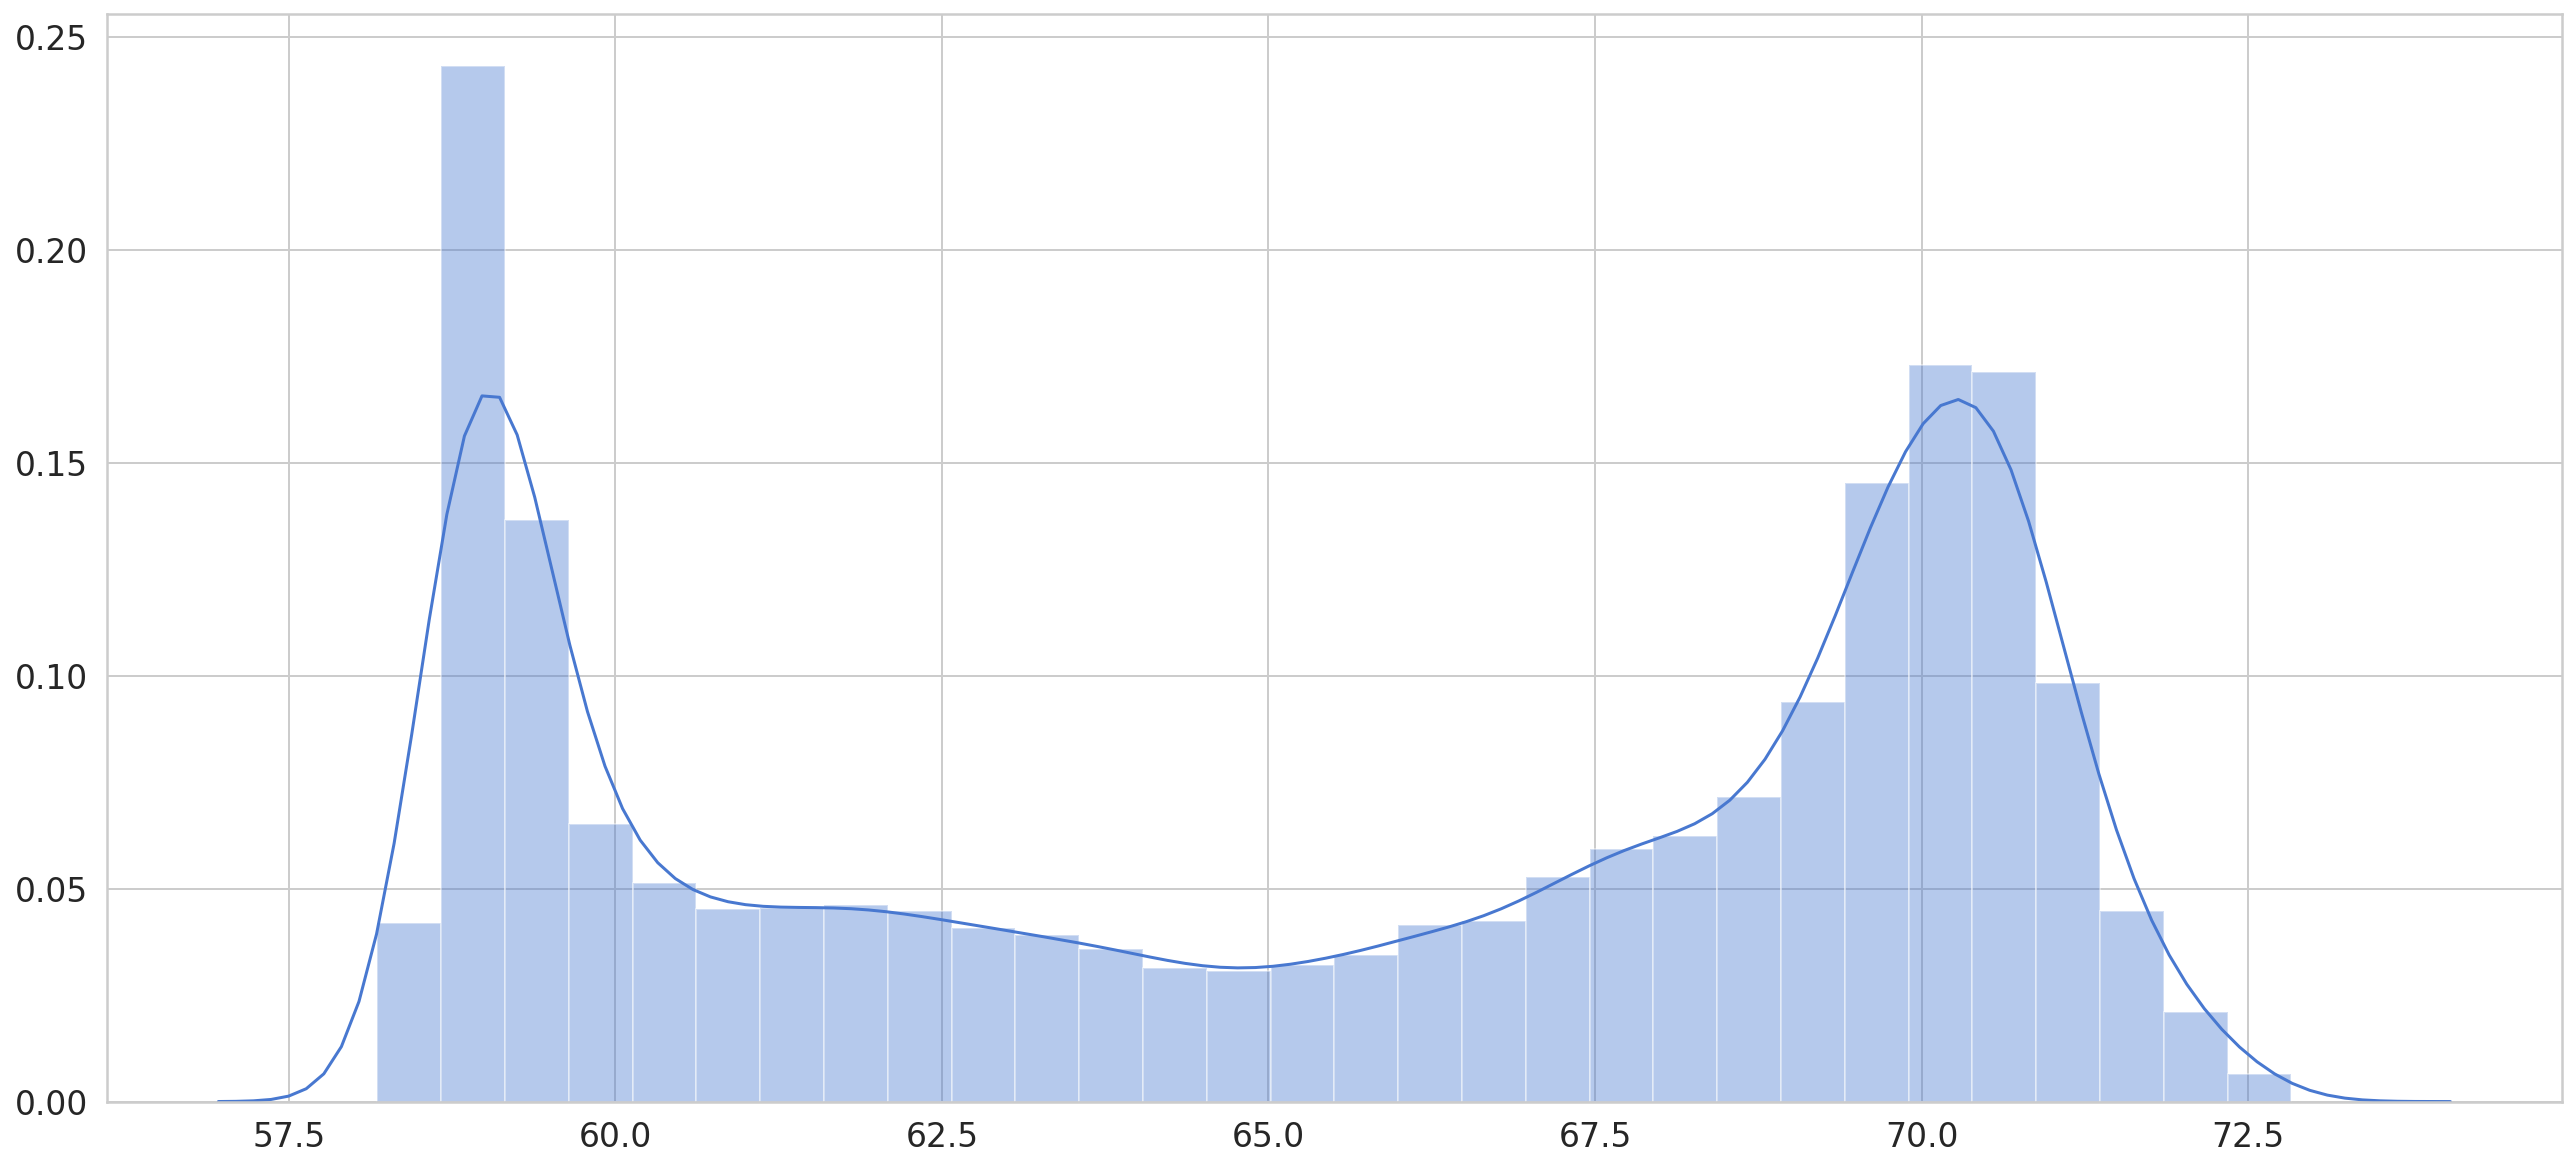

In [53]:
sns.distplot(train_mae_loss, bins = 30, kde = True)

In [54]:
 X_test_pred = model.predict(X_test)
 test_mae_loss = np.mean(np.abs(X_test_pred, X_test), axis = 1)

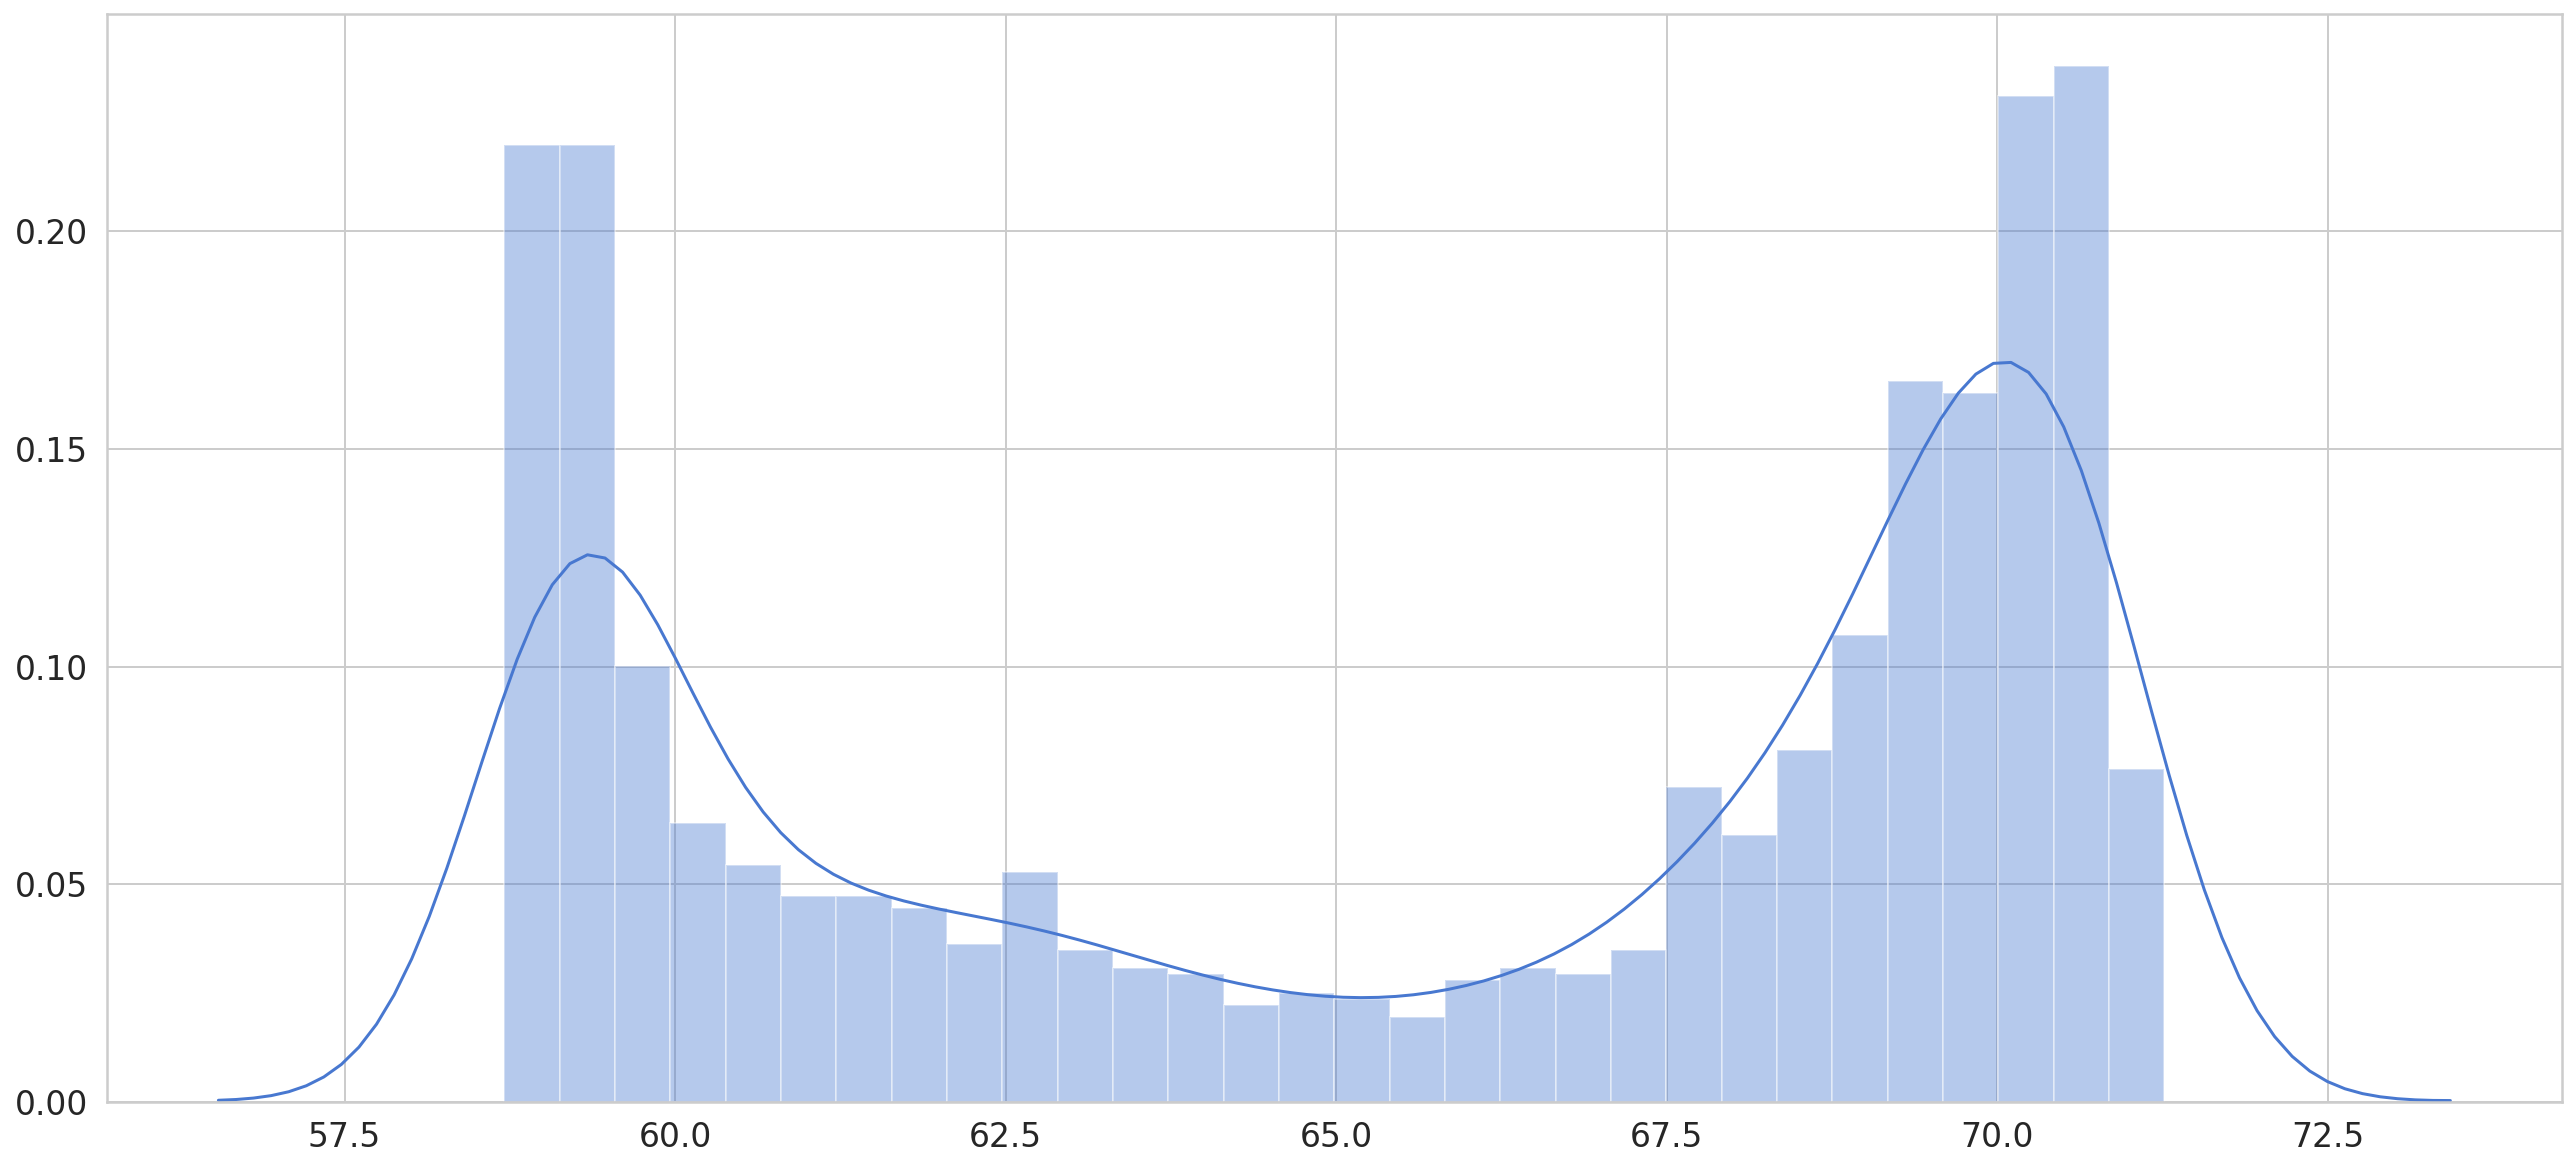

In [55]:
sns.distplot(test_mae_loss, bins = 30, kde = True)

In [56]:
test_mae_loss.shape

(1717, 8)

In [58]:
THRESHOLD = 67.5
test = dataset.iloc[train_size:len(dataset)]
test_score_df = pd.DataFrame(index = test[30:].index)
test_score_df['loss'] = test_mae_loss[:,7]
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
#test_score_df['temp_overall_mean'] = temp

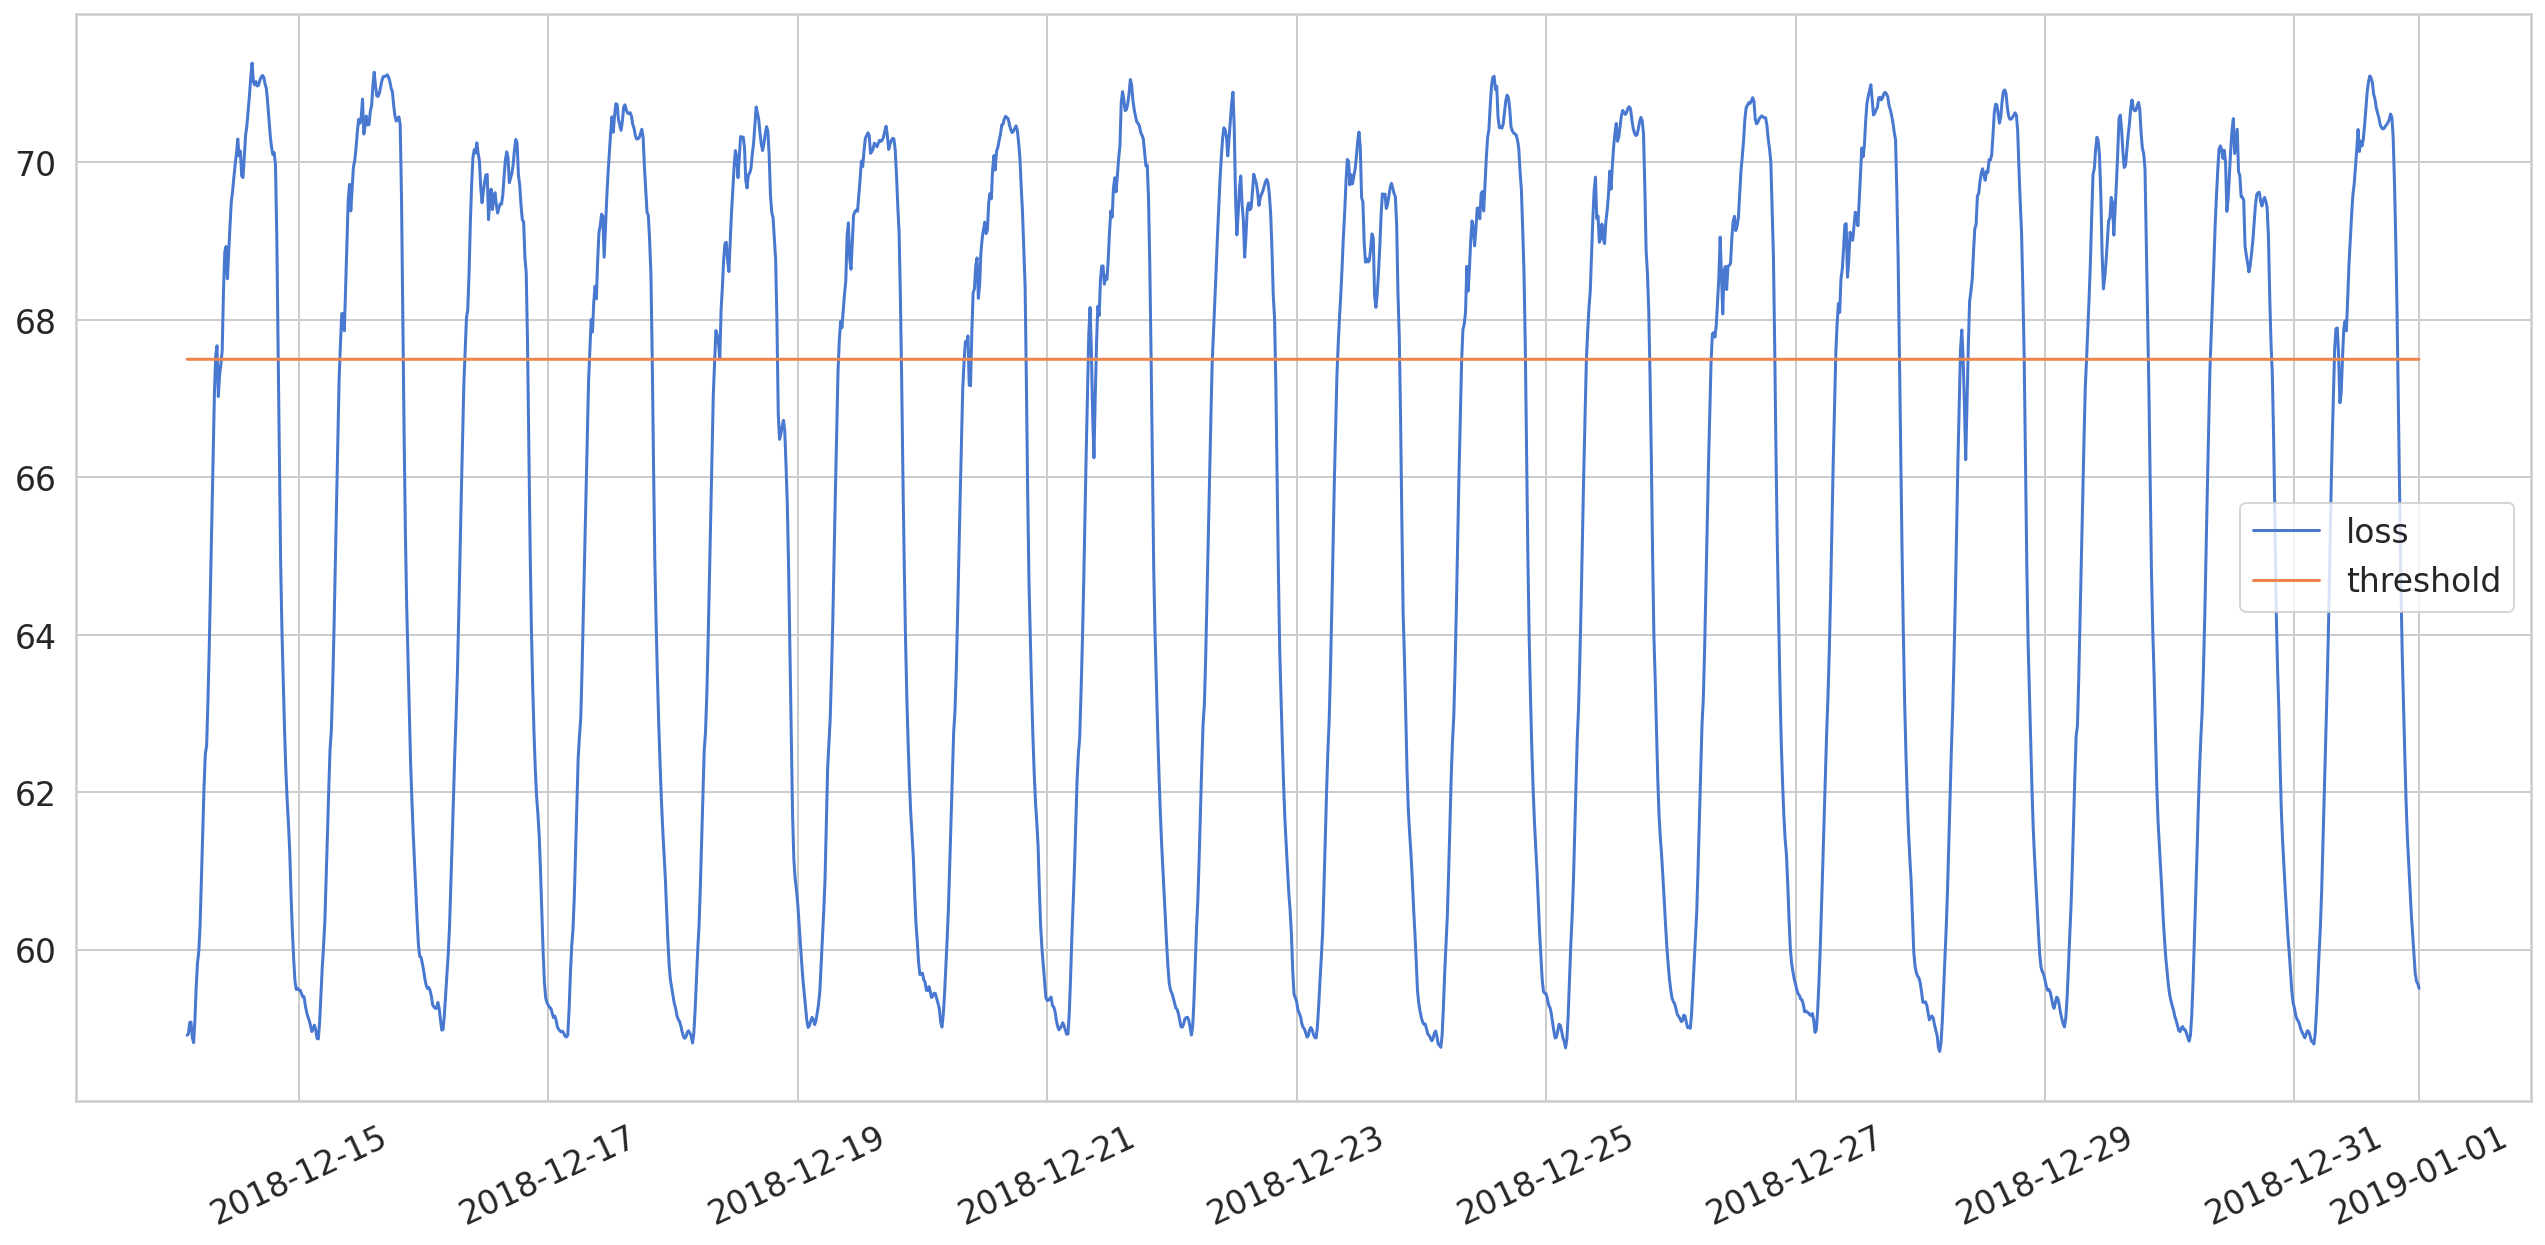

In [59]:
plt.plot(test_score_df.index, test_score_df.loss, label = 'loss')
plt.plot(test_score_df.index, test_score_df.threshold, label = 'threshold')
plt.xticks(rotation = 25)
plt.legend()